In [215]:
import re
import pandas as pd

In [216]:
f = open('WhatsApp Chat with Siddhi Hiray.txt', 'r', encoding = 'utf-8')

In [217]:
data = f.read()

In [218]:
print(data)

15/12/22, 10:16 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
15/12/22, 10:16 am - Kratis: import java.util.*;
public class LIExample
{
	public static void main(String args[])
	{
		Vector v = new Vector();
		for(int i=0;i<=10;i++)
		{
			v.addElement(i);
		}
		System.out.println("Vector Elements:-"+v);
		ListIterator litr = v.listIterator();
		while(litr.hasNext())
		{
			Integer item=(Integer)litr.next();
			System.out.println("Items are:-"+item);
			if(item == 5)
			{
				litr.set("Nishi");
			}
			if(item==10)
			{
				litr.add("Vishal");
			}
			if(item==6)
			{
				litr.remove();
			}
		}
		System.out.println("*******************************");
		System.out.println("After Updation:-");
		System.out.println("Items are :-"+v);
		System.out.println("*******************************");
		System.out.println("Reverse Direction:-");
		while(litr.hasPrevious())
		{
			System.out.println(litr.

In [219]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[AaPp][Mm]\s-\s'

In [220]:
messages = re.split(pattern,data)[1:]

In [221]:
messages = [i.strip() for i in messages]

In [222]:
dates = re.findall(pattern, data)

In [223]:
dates = [i.split(' -')[0] for i in dates]

In [224]:
dates = [i.replace(',', '') for i in dates]

In [225]:
dates

['15/12/22 10:16 am',
 '15/12/22 10:16 am',
 '15/12/22 10:16 am',
 '15/12/22 10:16 am',
 '15/12/22 11:34 am',
 '15/12/22 6:17 pm',
 '15/12/22 6:18 pm',
 '15/12/22 6:41 pm',
 '15/12/22 6:41 pm',
 '15/12/22 6:43 pm',
 '15/12/22 6:44 pm',
 '15/12/22 6:45 pm',
 '15/12/22 6:45 pm',
 '15/12/22 7:02 pm',
 '15/12/22 7:03 pm',
 '15/12/22 7:04 pm',
 '15/12/22 7:04 pm',
 '15/12/22 7:04 pm',
 '15/12/22 7:04 pm',
 '15/12/22 7:04 pm',
 '15/12/22 7:08 pm',
 '15/12/22 7:10 pm',
 '15/12/22 7:28 pm',
 '15/12/22 7:41 pm',
 '15/12/22 11:30 pm',
 '15/12/22 11:31 pm',
 '16/12/22 1:54 am',
 '16/12/22 1:57 am',
 '16/12/22 7:20 am',
 '16/12/22 7:21 am',
 '16/12/22 7:21 am',
 '16/12/22 7:26 am',
 '16/12/22 3:07 pm',
 '16/12/22 3:08 pm',
 '16/12/22 4:44 pm',
 '16/12/22 4:44 pm',
 '16/12/22 4:45 pm',
 '16/12/22 7:15 pm',
 '16/12/22 8:09 pm',
 '16/12/22 8:23 pm',
 '16/12/22 8:32 pm',
 '16/12/22 8:43 pm',
 '16/12/22 9:00 pm',
 '16/12/22 10:21 pm',
 '16/12/22 10:46 pm',
 '16/12/22 10:46 pm',
 '16/12/22 11:13 pm',
 '

In [226]:
dates[-1]

'10/03/23 7:48 pm'

In [227]:
dates[1]

'15/12/22 10:16 am'

In [228]:
pd.to_datetime(dates[11], dayfirst=True).month

12

### Creating Dataframe of dates and messages

In [229]:
df = pd.DataFrame({'message_date': dates,'user_message': messages})

In [230]:
df['message_date'] = pd.to_datetime(df['message_date'], dayfirst=True)

In [231]:
df

,message_date,user_message
0,2022-12-15 10:16:00,Messages and calls are end-to-end encrypted. N...
1,2022-12-15 10:16:00,Kratis: import java.util.*;\npublic class LIEx...
2,2022-12-15 10:16:00,Kratis: import java.util.*;\n\npublic class AL...
3,2022-12-15 10:16:00,Kratis: import java.util.*;\npublic class Demo...
4,2022-12-15 11:34:00,Siddhi Hiray: Thankyou
...,...,...
2858,2023-03-10 17:30:00,Siddhi Hiray: Aacha
2859,2023-03-10 17:30:00,Siddhi Hiray: Hay mg tayt ky diagram banvnar r...
2860,2023-03-10 17:53:00,Kratis: Hoo tech tr ani vikram bolto aahe kahi...
2861,2023-03-10 19:48:00,Siddhi Hiray: M ata


### Seperating Username and message

In [232]:
users = []
sep_messages = []
for msg in df['user_message']:
    entries = re.split('([\w\W]+?):\s', msg)
    if entries[1:]:
        users.append(entries[1])
        sep_messages.append(entries[2])
    else:
        users.append('group_nortification')
        sep_messages.append(entries[0])
df['user'] = users
df['message'] = sep_messages
df.drop(columns=['user_message'], inplace = True)
        

In [233]:
df

,message_date,user,message
0,2022-12-15 10:16:00,group_nortification,Messages and calls are end-to-end encrypted. N...
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou
...,...,...,...
2858,2023-03-10 17:30:00,Siddhi Hiray,Aacha
2859,2023-03-10 17:30:00,Siddhi Hiray,Hay mg tayt ky diagram banvnar right
2860,2023-03-10 17:53:00,Kratis,Hoo tech tr ani vikram bolto aahe kahii differ...
2861,2023-03-10 19:48:00,Siddhi Hiray,M ata


In [234]:
pd.to_datetime(df['message_date'].iloc[-1], format='%y%d%m').day

10

### Extracting the Year, Month and Date from the date column

In [235]:
df['year'] = df['message_date'].dt.year
df['month'] = df['message_date'].dt.month_name()
df['month_num'] = df['message_date'].dt.month
df['day'] = df['message_date'].dt.day
df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute

In [236]:
df.head()

,message_date,user,message,year,month,month_num,day,hour,minute
0,2022-12-15 10:16:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,December,12,15,10,16
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34


In [237]:
df.tail()

,message_date,user,message,year,month,month_num,day,hour,minute
2858,2023-03-10 17:30:00,Siddhi Hiray,Aacha,2023,March,3,10,17,30
2859,2023-03-10 17:30:00,Siddhi Hiray,Hay mg tayt ky diagram banvnar right,2023,March,3,10,17,30
2860,2023-03-10 17:53:00,Kratis,Hoo tech tr ani vikram bolto aahe kahii differ...,2023,March,3,10,17,53
2861,2023-03-10 19:48:00,Siddhi Hiray,M ata,2023,March,3,10,19,48
2862,2023-03-10 19:48:00,Siddhi Hiray,V4 na tayna exam maday ky asnar t,2023,March,3,10,19,48


In [238]:
df.user.unique()

array(['group_nortification', 'Kratis', 'Siddhi Hiray'], dtype=object)

### Streamlit Application

In [239]:
df[df['message'] == '<Media omitted>'].shape

(210, 9)

In [240]:
### Extracting url from messages

In [241]:
from urlextract import URLExtract

url_extractor = URLExtract()

links = []
for msg in df['message']:    
    links.extend(url_extractor.find_urls(msg))

In [242]:
links

['item.al',
 'System.in',
 'https://www.collegenote.net/curriculum/data-structures-and-algorithms/82/459/',
 'https://www.collegenote.net/curriculum/data-structures-and-algorithms/82/458/',
 'https://www.collegenote.net/curriculum/data-structures-and-algorithms/82/457/',
 'https://we.tl/t-EZUuaTFRIV',
 'https://we.tl/t-40Fcik0MlO',
 'https://tinyurl.com/mvt2a8ka',
 'bit.ly/3Yh6uMm',
 'https://we.tl/t-8beywt7GAT',
 'https://tinyurl.com/5ybfx9ye',
 'https://youtu.be/UTFxSn-N2Ps',
 'https://drive.google.com/drive/folders/1M-le9RR6_gs6LYV692X84SCGFOggEZoh?usp=share_link',
 'https://tinyurl.com/bd2h65n6',
 'https://drive.google.com/drive/folders/1M-le9RR6_gs6LYV692X84SCGFOggEZoh?usp=sharing',
 'https://tinyurl.com/bd2h65n6',
 'https://tinyurl.com/33emt62b',
 'http://shorturl.at/cyNW6',
 'https://www-softwaretestinghelp-com.cdn.ampproject.org/v/s/www.softwaretestinghelp.com/deque-in-cpp/amp/?amp_gsa=1&amp_js_v=a9&usqp=mq331AQKKAFQArABIIACAw%3D%3D#amp_tf=From%20%251%24s&aoh=16770811653886&ref

In [243]:
len(links)

35

In [244]:
### Most Frequent users

In [245]:
import matplotlib.pyplot as plt

In [246]:
top_5_user = df['user'].value_counts().head()

In [247]:
name = top_5_user.index
count = top_5_user.values

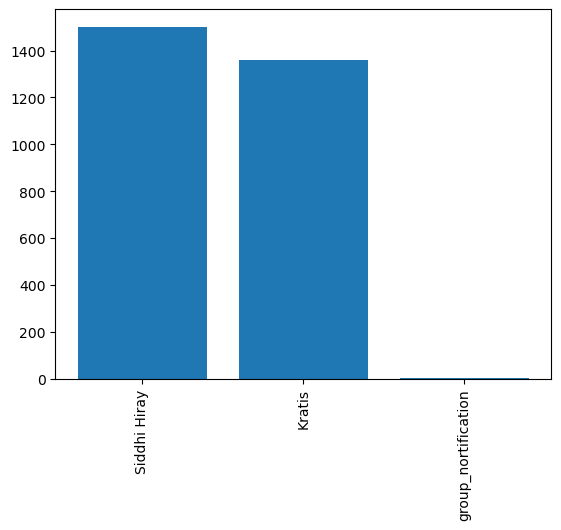

In [248]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [249]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'User', 'user': 'Usage Percent'})

,User,Usage Percent
0,Siddhi Hiray,52.46
1,Kratis,47.50
2,group_nortification,0.03


In [250]:
from wordcloud import WordCloud

In [251]:
def create_wordcloud(dataframe):

    wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
    df_wc = wc.generate(dataframe['message'].str.cat(sep = " "))
    return df_wc

In [252]:
create_wordcloud(df)

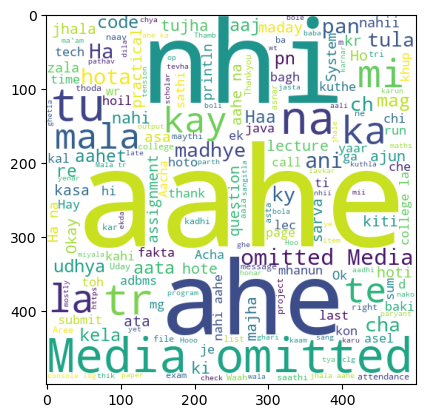

In [253]:
fig, ax = plt.subplots()
ax.imshow(create_wordcloud(df))
plt.show()

## Top 10 most used words

In [254]:
df.head()

,message_date,user,message,year,month,month_num,day,hour,minute
0,2022-12-15 10:16:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,December,12,15,10,16
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34


In [255]:
temp = df[df['user'] != 'group_nortification']
temp


,message_date,user,message,year,month,month_num,day,hour,minute
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34
5,2022-12-15 18:17:00,Kratis,It's okay re,2022,December,12,15,18,17
...,...,...,...,...,...,...,...,...,...
2858,2023-03-10 17:30:00,Siddhi Hiray,Aacha,2023,March,3,10,17,30
2859,2023-03-10 17:30:00,Siddhi Hiray,Hay mg tayt ky diagram banvnar right,2023,March,3,10,17,30
2860,2023-03-10 17:53:00,Kratis,Hoo tech tr ani vikram bolto aahe kahii differ...,2023,March,3,10,17,53
2861,2023-03-10 19:48:00,Siddhi Hiray,M ata,2023,March,3,10,19,48


In [256]:
temp = temp[temp['message'] != '<Media omitted>']
temp.head()

,message_date,user,message,year,month,month_num,day,hour,minute
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34
5,2022-12-15 18:17:00,Kratis,It's okay re,2022,December,12,15,18,17


In [257]:
temp.head(50)

,message_date,user,message,year,month,month_num,day,hour,minute
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34
5,2022-12-15 18:17:00,Kratis,It's okay re,2022,December,12,15,18,17
6,2022-12-15 18:18:00,Kratis,5-30 la sutlo amhi tila thambavla nahi nashib,2022,December,12,15,18,18
7,2022-12-15 18:41:00,Siddhi Hiray,Ohh yevda late,2022,December,12,15,18,41
8,2022-12-15 18:41:00,Siddhi Hiray,Aamhi tr lagych gelo,2022,December,12,15,18,41
9,2022-12-15 18:43:00,Kratis,Poster banvat hote udhya saathi he loka amhi t...,2022,December,12,15,18,43
10,2022-12-15 18:44:00,Kratis,Ajun mi ghari pan nahi pochlo aahe vichar kr,2022,December,12,15,18,44


In [258]:
file = open(file = 'stopwords-hinglish.txt', mode = 'r', encoding = 'utf-8')
stopwords = file.read()
print(stopwords)

.
..
...
?
??
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
c

In [259]:
words = []

for msg in temp['message']:
    for word in msg.lower().split():
        if word not in stopwords:
            words.append(word)

In [260]:
words

['import',
 'java.util.*;',
 'public',
 'class',
 'liexample',
 '{',
 'public',
 'static',
 'void',
 'main(string',
 'args[])',
 '{',
 'vector',
 '=',
 'vector();',
 'for(int',
 'i=0;i<=10;i++)',
 '{',
 'v.addelement(i);',
 '}',
 'system.out.println("vector',
 'elements:-"+v);',
 'listiterator',
 'litr',
 '=',
 'v.listiterator();',
 'while(litr.hasnext())',
 '{',
 'integer',
 'item=(integer)litr.next();',
 'system.out.println("items',
 'are:-"+item);',
 'if(item',
 '==',
 '5)',
 '{',
 'litr.set("nishi");',
 '}',
 'if(item==10)',
 '{',
 'litr.add("vishal");',
 '}',
 'if(item==6)',
 '{',
 'litr.remove();',
 '}',
 '}',
 'system.out.println("*******************************");',
 'system.out.println("after',
 'updation:-");',
 'system.out.println("items',
 ':-"+v);',
 'system.out.println("*******************************");',
 'system.out.println("reverse',
 'direction:-");',
 'while(litr.hasprevious())',
 '{',
 'system.out.println(litr.previous());',
 '}',
 '}',
 '}',
 'import',
 'java.util

In [261]:
from collections import Counter
word_freq = pd.DataFrame(Counter(words).most_common(20), columns=['Word', 'Frequency'])

In [262]:
word_freq

,Word,Frequency
0,aahe,487
1,mala,151
2,madhye,103
3,tula,95
4,kela,86
5,jhala,83
6,udhya,78
7,aahet,75
8,code,73
9,😂,59


In [263]:
word_freq['Word']

0           aahe
1           mala
2         madhye
3           tula
4           kela
5          jhala
6          udhya
7          aahet
8           code
9              😂
10            😂😂
11         tujha
12    assignment
13       college
14             {
15          ajun
16          kasa
17         maday
18         sarva
19             }
Name: Word, dtype: object

## Emoji Analysis

In [264]:
import emoji

In [265]:
emojis = []
for message in df['message']:
    emojis.extend([e for e in message if e in list(emoji.get_emoji_unicode_dict('en').values())])

In [266]:
emojis

['😳',
 '😅',
 '🤦',
 '🏻',
 '👍',
 '👍',
 '😏',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🥰',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '😅',
 '😁',
 '😂',
 '😂',
 '😅',
 '🤦',
 '🏻',
 '🤦',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '😂',
 '😂',
 '\U0001f972',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🎅',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😃',
 '😂',
 '🤦',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤦',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😅',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '\U0001f972',
 '🥳',
 '✨',
 '✨',
 '😅',
 '😂',
 '😂',
 '😂',
 '😮',
 '😂',
 '😂',
 '😂',
 '🤦',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🎊',
 '😂',
 '😅',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '\U0001f972',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤦',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 

In [267]:
pd.DataFrame(Counter(emojis).most_common(len(emojis)), columns = ['Emoji', 'Frequency'])

,Emoji,Frequency
0,😂,351
1,🥲,77
2,✨,17
3,🤦,16
4,🏻,16
5,🤣,14
6,😅,11
7,😁,11
8,😭,8
9,👀,6


In [268]:
df.head()

,message_date,user,message,year,month,month_num,day,hour,minute
0,2022-12-15 10:16:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,December,12,15,10,16
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,12,15,10,16
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,12,15,10,16
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,12,15,10,16
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,12,15,11,34


## Message Timeline

In [296]:
timeline = df.groupby(['year', 'month_num'], as_index=True).count()['message'].sort_index(ascending=True).reset_index()

In [299]:
timeline

,year,month_num,message
0,2022,12,398
1,2023,1,987
2,2023,2,1330
3,2023,3,148


In [300]:
time = []
for i in range(timeline.shape[0]):
    time.append(str(timeline['year'][i]) + '-' + str(timeline['month_num'][i]))


In [301]:
timeline['time'] = time

In [302]:
timeline

,year,month_num,message,time
0,2022,12,398,2022-12
1,2023,1,987,2023-1
2,2023,2,1330,2023-2
3,2023,3,148,2023-3


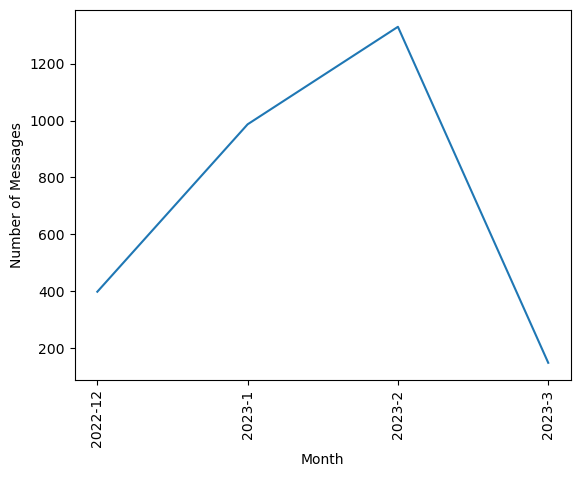

In [303]:
plt.ylabel('Number of Messages')
plt.xlabel('Month')
plt.xticks(rotation = 'vertical')
plt.plot(timeline['time'].values, timeline['message'].values)

## Daily Timeline

In [ ]:
df['only_date'] = df.message_date.dt.date

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [ ]:
daily_timeline

,only_date,message
0,2022-12-15,26
1,2022-12-16,24
2,2022-12-17,8
3,2022-12-19,7
4,2022-12-20,17
...,...,...
75,2023-03-03,1
76,2023-03-07,3
77,2023-03-08,45
78,2023-03-09,11


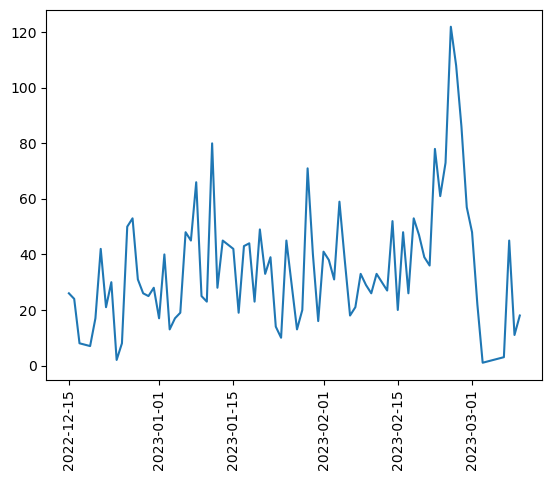

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [ ]:
df['day_name'] = df['message_date'].dt.day_name()

In [ ]:
df.head()

,message_date,user,message,year,month,day,hour,minute,only_date,day_name
0,2022-12-15 10:16:00,group_nortification,Messages and calls are end-to-end encrypted. N...,2022,December,15,10,16,2022-12-15,Thursday
1,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class LIExample\n{...,2022,December,15,10,16,2022-12-15,Thursday
2,2022-12-15 10:16:00,Kratis,import java.util.*;\n\npublic class ALDemo\n{\...,2022,December,15,10,16,2022-12-15,Thursday
3,2022-12-15 10:16:00,Kratis,import java.util.*;\npublic class Demostr\n{\n...,2022,December,15,10,16,2022-12-15,Thursday
4,2022-12-15 11:34:00,Siddhi Hiray,Thankyou,2022,December,15,11,34,2022-12-15,Thursday


<BarContainer object of 7 artists>

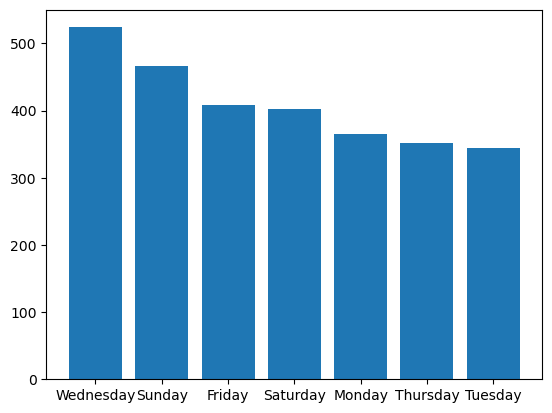

In [ ]:
plt.bar(df['day_name'].value_counts().index, (df['day_name'].value_counts().values))

## Heatmap of message timeline

In [ ]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + '00')
    elif hour == 00:
        period.append('00' + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [ ]:
period

['10-11',
 '10-11',
 '10-11',
 '10-11',
 '11-12',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '19-20',
 '23-00',
 '23-00',
 '1-2',
 '1-2',
 '7-8',
 '7-8',
 '7-8',
 '7-8',
 '15-16',
 '15-16',
 '16-17',
 '16-17',
 '16-17',
 '19-20',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '21-22',
 '22-23',
 '22-23',
 '22-23',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '00-1',
 '00-1',
 '00-1',
 '00-1',
 '00-1',
 '00-1',
 '00-1',
 '13-14',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '17-18',
 '17-18',
 '20-21',
 '20-21',
 '21-22',
 '21-22',
 '21-22',
 '21-22',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '23-00',
 '23-00',
 '23-00',
 '6-7',
 '6-7',
 '7-8',
 '7-8',
 '15-16',
 '15-16',
 '15-16',
 '15-16',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '16-17',
 '19-20',
 '20-21

In [ ]:
df['period'] = period

In [ ]:
period_df = df.pivot_table(index='day_name', columns='period', values = 'message', aggfunc='count').fillna(0)

In [ ]:
period_df

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,27.0,26.0,2.0,8.0,26.0,13.0,16.0,15.0,12.0,16.0,...,36.0,46.0,49.0,39.0,0.0,0.0,0.0,12.0,9.0,7.0
Monday,21.0,4.0,0.0,4.0,5.0,2.0,11.0,31.0,7.0,13.0,...,35.0,30.0,19.0,66.0,0.0,0.0,3.0,2.0,9.0,11.0
Saturday,32.0,10.0,13.0,43.0,17.0,60.0,7.0,36.0,11.0,20.0,...,24.0,30.0,20.0,31.0,1.0,0.0,0.0,0.0,0.0,13.0
Sunday,27.0,12.0,9.0,19.0,26.0,38.0,23.0,27.0,66.0,28.0,...,29.0,46.0,35.0,31.0,0.0,0.0,0.0,0.0,0.0,2.0
Thursday,20.0,6.0,23.0,6.0,4.0,3.0,8.0,7.0,1.0,21.0,...,14.0,48.0,28.0,66.0,0.0,0.0,2.0,9.0,0.0,21.0
Tuesday,19.0,0.0,7.0,5.0,7.0,0.0,4.0,18.0,8.0,9.0,...,43.0,25.0,35.0,55.0,0.0,0.0,0.0,5.0,12.0,17.0
Wednesday,19.0,0.0,0.0,11.0,3.0,13.0,17.0,45.0,25.0,20.0,...,40.0,99.0,69.0,41.0,0.0,2.0,2.0,6.0,5.0,11.0


In [ ]:
df['user'].unique()

array(['group_nortification', 'Kratis', 'Siddhi Hiray'], dtype=object)

In [ ]:
df['message'].head(50)

0     Messages and calls are end-to-end encrypted. N...
1     import java.util.*;\npublic class LIExample\n{...
2     import java.util.*;\n\npublic class ALDemo\n{\...
3     import java.util.*;\npublic class Demostr\n{\n...
4                                              Thankyou
5                                          It's okay re
6        5-30 la  sutlo amhi tila thambavla nahi nashib
7                                        Ohh yevda late
8                                  Aamhi tr lagych gelo
9     Poster banvat hote udhya saathi he loka amhi t...
10         Ajun mi ghari pan nahi pochlo aahe vichar kr
11                                     😳kupch late zala
12                 Uday lectures kashala thevlay ahet 😅
13        Are scene jhala hota tumhi gele na tya nantar
14    Divakar bola fakta 2 volunteers have aahet bak...
15                                              Kunacha
16           Tya saathi aata kami kele aahet volunteets
17                         Hay tayni aadhi sanga

In [ ]:
'<Media omitted>'  in df['message']

False

In [ ]:
df[df['message'] == '<Media omitted>']

,message_date,user,message,year,month,day,hour,minute,only_date,day_name,period
90,2022-12-21 16:14:00,Siddhi Hiray,<Media omitted>,2022,December,21,16,14,2022-12-21,Wednesday,16-17
97,2022-12-21 16:46:00,Kratis,<Media omitted>,2022,December,21,16,46,2022-12-21,Wednesday,16-17
197,2022-12-26 18:25:00,Kratis,<Media omitted>,2022,December,26,18,25,2022-12-26,Monday,18-19
198,2022-12-26 18:25:00,Kratis,<Media omitted>,2022,December,26,18,25,2022-12-26,Monday,18-19
209,2022-12-26 19:30:00,Kratis,<Media omitted>,2022,December,26,19,30,2022-12-26,Monday,19-20
...,...,...,...,...,...,...,...,...,...,...,...
2732,2023-03-01 19:07:00,Kratis,<Media omitted>,2023,March,1,19,7,2023-03-01,Wednesday,19-20
2733,2023-03-01 19:07:00,Kratis,<Media omitted>,2023,March,1,19,7,2023-03-01,Wednesday,19-20
2742,2023-03-01 20:21:00,Siddhi Hiray,<Media omitted>,2023,March,1,20,21,2023-03-01,Wednesday,20-21
2743,2023-03-01 20:21:00,Siddhi Hiray,<Media omitted>,2023,March,1,20,21,2023-03-01,Wednesday,20-21
